## Importing all the libraries

In [1]:
#Importing the libraries
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
final = pd.read_csv("19thFeb2022_100k_data_merged_with_sf_and_new_features_v2.csv")

In [3]:
final.shape

(8192801, 70)

In [4]:
final.columns

Index(['Unnamed: 0', 'code1', 'final_codes', 'DX Codetype',
       'DX Condition Type', 'meat', 'text', 'page', 'section', 'NLP_VERSION',
       'parent_rxcui_mapping', 'final_code_family', 'enc_id', 'dos_start',
       'dos_end', 'enc_class', 'unique_codes', 'code_count', 'npi.type',
       'chart_id', 'medicine_count', 'labtest_count',
       'embedded radiology/lab results_count', 'devices_count',
       'abnormal findings_count', 'generic term_count', 'plan_count',
       'procedure_count', 'radiology_count', 'labs_count', 'rx_count',
       'referral_count', 'symptoms_count', 'therapy_count', 'procedures_count',
       'others_count', 'physical_exam_count', 'evaluatory_term_count',
       'imaging_count', 'project_id', 'output', 'number_of_meat_per_Dx',
       'Has MEAT', 'Has RX MEAT', 'Has Procedure MEAT', 'Has Labs MEAT',
       'number_of_encounters_per_chart', 'number_of_code1_per_chart',
       'number_of_occurences_of_code1_per_chart', 'DX incidence per encounter',
       '

In [5]:
final.drop(columns =['Unnamed: 0','meat','section','text','percentage_of_autocodable_codes_per_chart',
                    'parent_rxcui_mapping','enc_id', 'dos_start', 'dos_end',
                    'final_code_family','unique_codes'],axis = 1,inplace = True)

In [6]:
final.output.value_counts(normalize = True)*100

0    62.196799
1    37.803201
Name: output, dtype: float64

In [7]:
final["code1"] = final["code1"].astype(str)

In [8]:
final.drop(final[final.code1 == "000"].index,inplace=True)

In [9]:
final.drop(final[final.code1 == "001"].index,inplace=True)

In [10]:
final.isnull().sum().nlargest(15)

project_id                              5090314
DX Condition Type                        804774
npi.type                                 204724
code1                                         0
final_codes                                   0
DX Codetype                                   0
page                                          0
NLP_VERSION                                   0
enc_class                                     0
code_count                                    0
chart_id                                      0
medicine_count                                0
labtest_count                                 0
embedded radiology/lab results_count          0
devices_count                                 0
dtype: int64

In [11]:
final["DX Condition Type"].fillna("Missing Values",inplace = True)

In [12]:
final["npi.type"].fillna("Missing Values",inplace = True)

In [13]:
final.isnull().sum().nlargest(15)

project_id                              5090314
code1                                         0
final_codes                                   0
DX Codetype                                   0
DX Condition Type                             0
page                                          0
NLP_VERSION                                   0
enc_class                                     0
code_count                                    0
npi.type                                      0
chart_id                                      0
medicine_count                                0
labtest_count                                 0
embedded radiology/lab results_count          0
devices_count                                 0
dtype: int64

In [14]:
for column in final:
    if final[column].dtype == 'float64':
        final[column] = pd.to_numeric(final[column], downcast = 'float')
    if final[column].dtype == 'int64':
        final[column] = pd.to_numeric(final[column], downcast = 'unsigned')

## Converting columns like medicine_count,labs_count, etc. to sparse data

In [15]:
def convert_to_sparse_data(df, exclude_columns=[]):
    """
    Function to convert columns of a data frame into SparseArrays and return the data frame with transformed columns.
    Use exclude_columns to specify columns to be excluded from transformation.
    
    Parameters
    ----------
    df: pandas data frame
    exclude_columns: list
        Columns not be converted to sparse
        
    Returns
    -------
    df: pandas data frame
    """
    df = df.copy()
    exclude_columns = set(exclude_columns)

    for (columnName, columnData) in df.iteritems():
        if columnName in exclude_columns:
            continue
        df[columnName] = pd.SparseArray(columnData.values, dtype='uint8')

    return df

final = convert_to_sparse_data(final, exclude_columns=['code1', 'final_codes', 'DX Codetype', 'DX Condition Type', 'page',
       'NLP_VERSION', 'enc_class', 'code_count', 'npi.type', 'chart_id', 'project_id', 'output', 'number_of_meat_per_Dx',
       'Has MEAT', 'Has RX MEAT', 'Has Procedure MEAT', 'Has Labs MEAT',
       'number_of_encounters_per_chart', 'number_of_code1_per_chart',
       'number_of_occurences_of_code1_per_chart', 'DX incidence per encounter',
       'number_of_encounters_per_chart_and_code1',
       'number_of_pages_per_chart_per_enc', 'number_of_pages_in_a_chart',
       'number_of_unique_sections_in_a_chart',
       'number_of_unique_codes_in_final_codes_per_Dx',
       'number_of_unique_parent_rxcui_mapping_per_Dx', 'code1_family',
       'number_of_code1_family_per_chart', 'Acute Condition',
       'number_of_acute_conditions_per_chart', 'Chronic Condition',
       'number_of_chronic_conditions_per_chart', 'dos_start_year',
       'dos_start_quarter', 'number_of_unique_dos_start_per_chart',
       'dos_count_of_different_year_per_chart_and_code1',
       'dos_in_different_year_per_chart_per_dx',
       'dos_count_of_different_quarter_per_chart_and_code1',
       'dos_in_different_quarter_per_chart_per_dx',
       'percentage_of_autocodable_codes_per_chart'                                                 
       ])

## Selecting charts with NLP_VERSION >= 3.5.0 as the training data

In [16]:
final = final[(final["NLP_VERSION"] == "V3.6.1") | (final["NLP_VERSION"] == "V3.6.0") | (final["NLP_VERSION"] == "V3.6.2")
             | (final["NLP_VERSION"] == "V3.6.3") | (final["NLP_VERSION"] == "V3.5.0") | (final["NLP_VERSION"] == "V3.5.1")
             | (final["NLP_VERSION"] == "V3.6.4") | (final["NLP_VERSION"] == "V3.6.5") | (final["NLP_VERSION"] == "V3.6.6")]

In [17]:
final.NLP_VERSION.value_counts(normalize = True)*100

V3.6.1    30.295398
V3.6.0    27.741475
V3.6.2    27.387320
V3.6.3    13.150374
V3.5.0     1.078265
V3.5.1     0.313397
V3.6.4     0.033772
Name: NLP_VERSION, dtype: float64

In [18]:
complexity = pd.read_csv("complexity_ac 2.csv")

In [19]:
complexity.columns

Index(['chart_id', 'project_id', 'coding_type', 'code_acc', 'code_fp',
       'actual_hcc_status', 'nlp_code_count', 'prod_code_count', 'complexity',
       'actual_ac'],
      dtype='object')

In [20]:
complexity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906648 entries, 0 to 906647
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   chart_id           906648 non-null  object 
 1   project_id         906648 non-null  int64  
 2   coding_type        906648 non-null  object 
 3   code_acc           612189 non-null  float64
 4   code_fp            821650 non-null  float64
 5   actual_hcc_status  906648 non-null  object 
 6   nlp_code_count     502218 non-null  float64
 7   prod_code_count    502218 non-null  float64
 8   complexity         906648 non-null  float64
 9   actual_ac          906648 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(3)
memory usage: 63.1+ MB


In [21]:

for column in complexity:
    if complexity[column].dtype == 'float64':
        complexity[column] = pd.to_numeric(complexity[column], downcast = 'float')
    if complexity[column].dtype == 'int64':
        complexity[column] = pd.to_numeric(complexity[column], downcast = 'unsigned')
    


In [22]:
complexity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906648 entries, 0 to 906647
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   chart_id           906648 non-null  object 
 1   project_id         906648 non-null  uint32 
 2   coding_type        906648 non-null  object 
 3   code_acc           612189 non-null  float32
 4   code_fp            821650 non-null  float32
 5   actual_hcc_status  906648 non-null  object 
 6   nlp_code_count     502218 non-null  float32
 7   prod_code_count    502218 non-null  float32
 8   complexity         906648 non-null  float32
 9   actual_ac          906648 non-null  bool   
dtypes: bool(1), float32(5), object(3), uint32(1)
memory usage: 42.4+ MB


In [23]:
complexity.drop_duplicates(keep = 'first',inplace = True)

In [24]:
complexity["chart_id"] = complexity["chart_id"].astype(str)

In [25]:
final["chart_id"] = final["chart_id"].astype(str)

In [26]:
final = final.merge(complexity[['chart_id', 'project_id', 'coding_type','complexity']], on = 'chart_id', how='left')

In [27]:
final['code1_family'] = final['code1_family'].astype('category')
final['code1'] = final['code1'].astype('category')
final['coding_type'] = final['coding_type'].astype('category')
final['final_codes'] = final['final_codes'].astype('category')
final['DX Codetype'] = final['DX Codetype'].astype('category')
final['DX Condition Type'] = final['DX Condition Type'].astype('category')
final['NLP_VERSION'] = final['NLP_VERSION'].astype('category')
final['npi.type'] = final['npi.type'].astype('category')
final['enc_class'] = final['enc_class'].astype('category')
final['dos_start_quarter'] = final['dos_start_quarter'].astype('category')

## Preparing test data

In [28]:
test = pd.read_csv("19thFeb2022_100k_120k_data_merged_with_sf_and_new_features_v2.csv")

In [29]:
test.shape

(2088320, 70)

In [30]:
test.drop(columns =['Unnamed: 0','meat','section','text','percentage_of_autocodable_codes_per_chart',
                    'parent_rxcui_mapping','enc_id', 'dos_start', 'dos_end',
                    'final_code_family','unique_codes'],axis = 1,inplace = True)

In [31]:
test.isnull().sum().nlargest(15)

project_id                              834166
DX Condition Type                       155882
npi.type                                 38427
code1                                        0
final_codes                                  0
DX Codetype                                  0
page                                         0
NLP_VERSION                                  0
enc_class                                    0
code_count                                   0
chart_id                                     0
medicine_count                               0
labtest_count                                0
embedded radiology/lab results_count         0
devices_count                                0
dtype: int64

In [32]:
test["DX Condition Type"].fillna("Missing Values",inplace = True)

In [33]:
test["npi.type"].fillna("Missing Values",inplace = True)

In [34]:
test.isnull().sum().nlargest(15)

project_id                              834166
code1                                        0
final_codes                                  0
DX Codetype                                  0
DX Condition Type                            0
page                                         0
NLP_VERSION                                  0
enc_class                                    0
code_count                                   0
npi.type                                     0
chart_id                                     0
medicine_count                               0
labtest_count                                0
embedded radiology/lab results_count         0
devices_count                                0
dtype: int64

In [35]:
for column in test:
    if test[column].dtype == 'float64':
        test[column] = pd.to_numeric(test[column], downcast = 'float')
    if test[column].dtype == 'int64':
        test[column] = pd.to_numeric(test[column], downcast = 'unsigned')

In [36]:
def convert_to_sparse_data(df, exclude_columns=[]):
    """
    Function to convert columns of a data frame into SparseArrays and return the data frame with transformed columns.
    Use exclude_columns to specify columns to be excluded from transformation.
    
    Parameters
    ----------
    df: pandas data frame
    exclude_columns: list
        Columns not be converted to sparse
        
    Returns
    -------
    df: pandas data frame
    """
    df = df.copy()
    exclude_columns = set(exclude_columns)

    for (columnName, columnData) in df.iteritems():
        if columnName in exclude_columns:
            continue
        df[columnName] = pd.SparseArray(columnData.values, dtype='uint8')

    return df

test = convert_to_sparse_data(test, exclude_columns=['code1', 'final_codes', 'DX Codetype', 'DX Condition Type', 'page',
       'NLP_VERSION', 'enc_class', 'code_count', 'npi.type', 'chart_id', 'project_id', 'output', 'number_of_meat_per_Dx',
       'Has MEAT', 'Has RX MEAT', 'Has Procedure MEAT', 'Has Labs MEAT',
       'number_of_encounters_per_chart', 'number_of_code1_per_chart',
       'number_of_occurences_of_code1_per_chart', 'DX incidence per encounter',
       'number_of_encounters_per_chart_and_code1',
       'number_of_pages_per_chart_per_enc', 'number_of_pages_in_a_chart',
       'number_of_unique_sections_in_a_chart',
       'number_of_unique_codes_in_final_codes_per_Dx',
       'number_of_unique_parent_rxcui_mapping_per_Dx', 'code1_family',
       'number_of_code1_family_per_chart', 'Acute Condition',
       'number_of_acute_conditions_per_chart', 'Chronic Condition',
       'number_of_chronic_conditions_per_chart', 'dos_start_year',
       'dos_start_quarter', 'number_of_unique_dos_start_per_chart',
       'dos_count_of_different_year_per_chart_and_code1',
       'dos_in_different_year_per_chart_per_dx',
       'dos_count_of_different_quarter_per_chart_and_code1',
       'dos_in_different_quarter_per_chart_per_dx',
       'percentage_of_autocodable_codes_per_chart'                                                 
       ])

In [37]:
test["chart_id"] = test["chart_id"].astype(str)

In [38]:
test = test.merge(complexity[['chart_id', 'project_id', 'coding_type','complexity']], on = 'chart_id', how='left')

In [39]:
test.isnull().sum().nlargest(15)

project_id_x                            834198
code1                                        0
final_codes                                  0
DX Codetype                                  0
DX Condition Type                            0
page                                         0
NLP_VERSION                                  0
enc_class                                    0
code_count                                   0
npi.type                                     0
chart_id                                     0
medicine_count                               0
labtest_count                                0
embedded radiology/lab results_count         0
devices_count                                0
dtype: int64

In [40]:
test['code1'] = test['code1'].astype('category')
test['code1_family'] = test['code1_family'].astype('category')
test['coding_type'] = test['coding_type'].astype('category')
test['final_codes'] = test['final_codes'].astype('category')
test['DX Codetype'] = test['DX Codetype'].astype('category')
test['DX Condition Type'] = test['DX Condition Type'].astype('category')
test['NLP_VERSION'] = test['NLP_VERSION'].astype('category')
test['npi.type'] = test['npi.type'].astype('category')
test['enc_class'] = test['enc_class'].astype('category')
test['dos_start_quarter'] = test['dos_start_quarter'].astype('category')

In [41]:
final.shape

(5526867, 62)

In [42]:
test.shape

(2088364, 62)

## Generating X_train, y_train, X_test and y_test

In [43]:
X_train = final.drop(['output'],axis = 1)
y_train = final['output']

In [44]:
X_test = test.drop(['output'],axis = 1)
y_test = test['output']

In [45]:
X_train.shape

(5526867, 61)

In [46]:
X_test.shape

(2088364, 61)

In [47]:
X_train_2 = X_train.drop(columns=['chart_id','NLP_VERSION','project_id_x','project_id_y'],axis=1)

In [48]:
X_test_2 = X_test.drop(columns=['chart_id','NLP_VERSION','project_id_x','project_id_y'],axis=1)

In [49]:
categorical_features_indices = np.where((X_train_2.dtypes == "category") | (X_train_2.dtypes == object))[0]

In [50]:
categorical_features_indices

array([ 0,  1,  2,  3,  5,  7, 42, 49, 55])

In [51]:
for column in X_train_2:
    if X_train_2[column].dtype == 'float64':
        X_train_2[column] = pd.to_numeric(X_train_2[column], downcast = 'float')
    if X_train_2[column].dtype == 'int64':
        X_train_2[column] = pd.to_numeric(X_train_2[column], downcast = 'unsigned')
    if X_train_2[column].dtype == 'object':
        X_train_2[column] =  X_train_2[column].astype("category")

In [52]:
for column in X_test_2:
    if X_test_2[column].dtype == 'float64':
        X_test_2[column] = pd.to_numeric(X_test_2[column], downcast = 'float')
    if X_test_2[column].dtype == 'int64':
        X_test_2[column] = pd.to_numeric(X_test_2[column], downcast = 'unsigned')
    if X_test_2[column].dtype == 'object':
        X_test_2[column] =  X_test_2[column].astype("category")

## Building the Model

In [53]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [54]:
from catboost import CatBoostClassifier

In [55]:
model = CatBoostClassifier(iterations=100,depth = 3,learning_rate=0.5,l2_leaf_reg = 5, eval_metric = 'Accuracy', verbose = True)
model.fit(X_train_2, y_train,cat_features=categorical_features_indices,eval_set=(X_test_2, y_test),use_best_model = True,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.7390896	test: 0.7508289	best: 0.7508289 (0)	total: 2.28s	remaining: 3m 45s
1:	learn: 0.7557137	test: 0.7600519	best: 0.7600519 (1)	total: 4.37s	remaining: 3m 34s
2:	learn: 0.7726088	test: 0.8037349	best: 0.8037349 (2)	total: 6.08s	remaining: 3m 16s
3:	learn: 0.7870850	test: 0.8055262	best: 0.8055262 (3)	total: 7.85s	remaining: 3m 8s
4:	learn: 0.7957848	test: 0.7997035	best: 0.8055262 (3)	total: 9.5s	remaining: 3m
5:	learn: 0.7995269	test: 0.8027633	best: 0.8055262 (3)	total: 11s	remaining: 2m 52s
6:	learn: 0.8042383	test: 0.8104052	best: 0.8104052 (6)	total: 12.5s	remaining: 2m 45s
7:	learn: 0.8054907	test: 0.8120002	best: 0.8120002 (7)	total: 14s	remaining: 2m 41s
8:	learn: 0.8093379	test: 0.8113193	best: 0.8120002 (7)	total: 15.5s	remaining: 2m 36s
9:	learn: 0.8103814	test: 0.8173949	best: 0.8173949 (9)	total: 17s	remaining: 2m 32s
10:	learn: 0.8128844	test: 0.8141770	best: 0.8173949 (9)	total: 18.5s	remaining: 2m 29s
11:	learn: 0.8179256	test: 0.8204144	best: 0.8204144 (

## Feature Importance

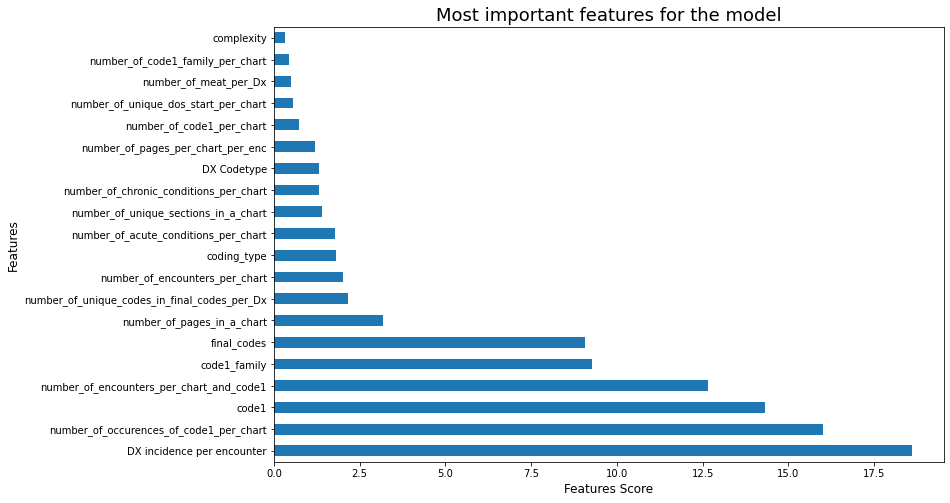

In [56]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
plt.title("Most important features for the model",fontsize = 18)
feat_importances = pd.Series(model.feature_importances_, index=X_train_2.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.xlabel("Features Score",fontsize = 12)
plt.ylabel("Features",fontsize = 12)
plt.show()

In [57]:
feat_importances.nlargest(20)

DX incidence per encounter                      18.591553
number_of_occurences_of_code1_per_chart         16.016940
code1                                           14.328664
number_of_encounters_per_chart_and_code1        12.660703
code1_family                                     9.277322
final_codes                                      9.082727
number_of_pages_in_a_chart                       3.164767
number_of_unique_codes_in_final_codes_per_Dx     2.164610
number_of_encounters_per_chart                   2.006070
coding_type                                      1.817578
number_of_acute_conditions_per_chart             1.781040
number_of_unique_sections_in_a_chart             1.393204
number_of_chronic_conditions_per_chart           1.320007
DX Codetype                                      1.305471
number_of_pages_per_chart_per_enc                1.198267
number_of_code1_per_chart                        0.736702
number_of_unique_dos_start_per_chart             0.552981
number_of_meat

In [58]:
predict_y_test = model.predict(X_test_2)

In [59]:
predict_y_test_prob = model.predict_proba(X_test_2)

In [60]:
predict_y_test_prob[:10]

array([[2.15652456e-01, 7.84347544e-01],
       [2.15652456e-01, 7.84347544e-01],
       [9.98018411e-01, 1.98158870e-03],
       [2.15652456e-01, 7.84347544e-01],
       [9.30457906e-01, 6.95420941e-02],
       [2.42994758e-01, 7.57005242e-01],
       [2.42994758e-01, 7.57005242e-01],
       [9.97654280e-01, 2.34572009e-03],
       [9.99065955e-01, 9.34045066e-04],
       [2.42994758e-01, 7.57005242e-01]])

In [61]:
p = np.array(predict_y_test_prob[8])
print('p: ', p)
print('sum: ', p.sum())                        

np.set_printoptions(suppress=True)
print('p: ', p) 

p:  [9.99065955e-01 9.34045066e-04]
sum:  1.0
p:  [0.99906595 0.00093405]


In [62]:
predict_y_test[:10]

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1])

## Classification Report

In [63]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [64]:
#Classification Report
print(classification_report(y_test, predict_y_test))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85    834198
           1       0.89      0.90      0.90   1254166

    accuracy                           0.88   2088364
   macro avg       0.87      0.87      0.87   2088364
weighted avg       0.88      0.88      0.88   2088364



In [65]:
print(accuracy_score(y_test, predict_y_test))

0.8773858388671707


## Results

In [66]:
X_test.drop(columns = ['medicine_count', 'labtest_count',
       'embedded radiology/lab results_count', 'devices_count',
       'abnormal findings_count', 'generic term_count', 'plan_count',
       'procedure_count', 'radiology_count', 'labs_count', 'rx_count',
       'referral_count', 'symptoms_count', 'therapy_count', 'procedures_count',
       'others_count', 'physical_exam_count', 'evaluatory_term_count',
       'imaging_count', 'project_id_x','project_id_y'],axis = 1,inplace = True)

In [67]:
test_data = pd.concat((X_test,y_test),axis = 1)
test_data

,code1,final_codes,DX Codetype,DX Condition Type,page,NLP_VERSION,enc_class,code_count,npi.type,chart_id,...,dos_start_year,dos_start_quarter,number_of_unique_dos_start_per_chart,dos_count_of_different_year_per_chart_and_code1,dos_in_different_year_per_chart_per_dx,dos_count_of_different_quarter_per_chart_and_code1,dos_in_different_quarter_per_chart_per_dx,coding_type,complexity,output
0,E119,['E119'],Medicare Part C,Chronic,4,V3.6.1,Acceptable,2,SIGN-CRED,39355331,...,2020,2020Q3,3,1,0,2,1,Medicare Part C,0.9,0
1,E119,['E119'],Medicare Part C,Chronic,4,V3.6.1,Acceptable,2,SIGN-CRED,39355331,...,2020,2020Q3,3,1,0,2,1,Medicare Part C,0.9,0
2,I219,['I219'],Medicare Part C,Acute,4,V3.6.1,Acceptable,2,SIGN-CRED,39355331,...,2020,2020Q3,3,1,0,2,1,Medicare Part C,0.9,0
3,E119,['E119'],Medicare Part C,Chronic,6,V3.6.1,Acceptable,2,SIGN-CRED,39355331,...,2020,2020Q3,3,1,0,2,1,Medicare Part C,0.9,0
4,I4891,['I4891'],Medicare Part C,Acute,8,V3.6.1,Acceptable,4,SIGN-CRED,39355331,...,2020,2020Q3,3,1,0,1,0,Medicare Part C,0.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088359,J4520,['J4520'],Commercial,Chronic,17,V3.4.4,Acceptable,2,CRED,5356265,...,2021,2021Q3,1,1,0,1,0,Commercial,0.8,1
2088360,J4520,['J4520'],Commercial,Chronic,17,V3.4.4,Acceptable,2,CRED,5356265,...,2021,2021Q3,1,1,0,1,0,Commercial,0.8,1
2088361,J45909,['J45909'],Commercial,Chronic,17,V3.4.4,Acceptable,2,CRED,5356265,...,2021,2021Q3,1,1,0,1,0,Commercial,0.8,0
2088362,J4520,['J4520'],Commercial,Chronic,18,V3.4.4,Acceptable,2,CRED,5356265,...,2021,2021Q3,1,1,0,1,0,Commercial,0.8,1


In [68]:
test_data_2 = test_data.reset_index()
test_data_2

,index,code1,final_codes,DX Codetype,DX Condition Type,page,NLP_VERSION,enc_class,code_count,npi.type,...,dos_start_year,dos_start_quarter,number_of_unique_dos_start_per_chart,dos_count_of_different_year_per_chart_and_code1,dos_in_different_year_per_chart_per_dx,dos_count_of_different_quarter_per_chart_and_code1,dos_in_different_quarter_per_chart_per_dx,coding_type,complexity,output
0,0,E119,['E119'],Medicare Part C,Chronic,4,V3.6.1,Acceptable,2,SIGN-CRED,...,2020,2020Q3,3,1,0,2,1,Medicare Part C,0.9,0
1,1,E119,['E119'],Medicare Part C,Chronic,4,V3.6.1,Acceptable,2,SIGN-CRED,...,2020,2020Q3,3,1,0,2,1,Medicare Part C,0.9,0
2,2,I219,['I219'],Medicare Part C,Acute,4,V3.6.1,Acceptable,2,SIGN-CRED,...,2020,2020Q3,3,1,0,2,1,Medicare Part C,0.9,0
3,3,E119,['E119'],Medicare Part C,Chronic,6,V3.6.1,Acceptable,2,SIGN-CRED,...,2020,2020Q3,3,1,0,2,1,Medicare Part C,0.9,0
4,4,I4891,['I4891'],Medicare Part C,Acute,8,V3.6.1,Acceptable,4,SIGN-CRED,...,2020,2020Q3,3,1,0,1,0,Medicare Part C,0.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088359,2088359,J4520,['J4520'],Commercial,Chronic,17,V3.4.4,Acceptable,2,CRED,...,2021,2021Q3,1,1,0,1,0,Commercial,0.8,1
2088360,2088360,J4520,['J4520'],Commercial,Chronic,17,V3.4.4,Acceptable,2,CRED,...,2021,2021Q3,1,1,0,1,0,Commercial,0.8,1
2088361,2088361,J45909,['J45909'],Commercial,Chronic,17,V3.4.4,Acceptable,2,CRED,...,2021,2021Q3,1,1,0,1,0,Commercial,0.8,0
2088362,2088362,J4520,['J4520'],Commercial,Chronic,18,V3.4.4,Acceptable,2,CRED,...,2021,2021Q3,1,1,0,1,0,Commercial,0.8,1


In [69]:
y_pred = pd.Series(predict_y_test,name="pred")
y_pred

0          1
1          1
2          0
3          1
4          0
          ..
2088359    1
2088360    1
2088361    1
2088362    1
2088363    1
Name: pred, Length: 2088364, dtype: int64

In [70]:
y_test

0          0
1          0
2          0
3          0
4          1
          ..
2088359    1
2088360    1
2088361    0
2088362    1
2088363    1
Name: output, Length: 2088364, dtype: uint8

In [71]:
predict_y_test_prob

array([[0.21565246, 0.78434754],
       [0.21565246, 0.78434754],
       [0.99801841, 0.00198159],
       ...,
       [0.4136011 , 0.5863989 ],
       [0.03059883, 0.96940117],
       [0.03059883, 0.96940117]])

In [72]:
y_pred_prob = pd.DataFrame(predict_y_test_prob,columns=["0_probability","1_probability"])
y_pred_prob

,0_probability,1_probability
0,0.215652,0.784348
1,0.215652,0.784348
2,0.998018,0.001982
3,0.215652,0.784348
4,0.930458,0.069542
...,...,...
2088359,0.030599,0.969401
2088360,0.030599,0.969401
2088361,0.413601,0.586399
2088362,0.030599,0.969401


In [73]:
test_data_2 = pd.concat((test_data_2,y_pred),axis = 1)
test_data_2

,index,code1,final_codes,DX Codetype,DX Condition Type,page,NLP_VERSION,enc_class,code_count,npi.type,...,dos_start_quarter,number_of_unique_dos_start_per_chart,dos_count_of_different_year_per_chart_and_code1,dos_in_different_year_per_chart_per_dx,dos_count_of_different_quarter_per_chart_and_code1,dos_in_different_quarter_per_chart_per_dx,coding_type,complexity,output,pred
0,0,E119,['E119'],Medicare Part C,Chronic,4,V3.6.1,Acceptable,2,SIGN-CRED,...,2020Q3,3,1,0,2,1,Medicare Part C,0.9,0,1
1,1,E119,['E119'],Medicare Part C,Chronic,4,V3.6.1,Acceptable,2,SIGN-CRED,...,2020Q3,3,1,0,2,1,Medicare Part C,0.9,0,1
2,2,I219,['I219'],Medicare Part C,Acute,4,V3.6.1,Acceptable,2,SIGN-CRED,...,2020Q3,3,1,0,2,1,Medicare Part C,0.9,0,0
3,3,E119,['E119'],Medicare Part C,Chronic,6,V3.6.1,Acceptable,2,SIGN-CRED,...,2020Q3,3,1,0,2,1,Medicare Part C,0.9,0,1
4,4,I4891,['I4891'],Medicare Part C,Acute,8,V3.6.1,Acceptable,4,SIGN-CRED,...,2020Q3,3,1,0,1,0,Medicare Part C,0.9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088359,2088359,J4520,['J4520'],Commercial,Chronic,17,V3.4.4,Acceptable,2,CRED,...,2021Q3,1,1,0,1,0,Commercial,0.8,1,1
2088360,2088360,J4520,['J4520'],Commercial,Chronic,17,V3.4.4,Acceptable,2,CRED,...,2021Q3,1,1,0,1,0,Commercial,0.8,1,1
2088361,2088361,J45909,['J45909'],Commercial,Chronic,17,V3.4.4,Acceptable,2,CRED,...,2021Q3,1,1,0,1,0,Commercial,0.8,0,1
2088362,2088362,J4520,['J4520'],Commercial,Chronic,18,V3.4.4,Acceptable,2,CRED,...,2021Q3,1,1,0,1,0,Commercial,0.8,1,1


In [74]:
test_data_3 = pd.concat((test_data_2,y_pred_prob),axis = 1)
test_data_3.head()

,index,code1,final_codes,DX Codetype,DX Condition Type,page,NLP_VERSION,enc_class,code_count,npi.type,...,dos_count_of_different_year_per_chart_and_code1,dos_in_different_year_per_chart_per_dx,dos_count_of_different_quarter_per_chart_and_code1,dos_in_different_quarter_per_chart_per_dx,coding_type,complexity,output,pred,0_probability,1_probability
0,0,E119,['E119'],Medicare Part C,Chronic,4,V3.6.1,Acceptable,2,SIGN-CRED,...,1,0,2,1,Medicare Part C,0.9,0,1,0.215652,0.784348
1,1,E119,['E119'],Medicare Part C,Chronic,4,V3.6.1,Acceptable,2,SIGN-CRED,...,1,0,2,1,Medicare Part C,0.9,0,1,0.215652,0.784348
2,2,I219,['I219'],Medicare Part C,Acute,4,V3.6.1,Acceptable,2,SIGN-CRED,...,1,0,2,1,Medicare Part C,0.9,0,0,0.998018,0.001982
3,3,E119,['E119'],Medicare Part C,Chronic,6,V3.6.1,Acceptable,2,SIGN-CRED,...,1,0,2,1,Medicare Part C,0.9,0,1,0.215652,0.784348
4,4,I4891,['I4891'],Medicare Part C,Acute,8,V3.6.1,Acceptable,4,SIGN-CRED,...,1,0,1,0,Medicare Part C,0.9,1,0,0.930458,0.069542


In [75]:
test_data_3[['chart_id','code1','output','pred', '0_probability', '1_probability']].head()

,chart_id,code1,output,pred,0_probability,1_probability
0,39355331,E119,0,1,0.215652,0.784348
1,39355331,E119,0,1,0.215652,0.784348
2,39355331,I219,0,0,0.998018,0.001982
3,39355331,E119,0,1,0.215652,0.784348
4,39355331,I4891,1,0,0.930458,0.069542


## PRF1 with different thresholds

In [76]:
#Classification Report
print(classification_report(y_test, predict_y_test))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85    834198
           1       0.89      0.90      0.90   1254166

    accuracy                           0.88   2088364
   macro avg       0.87      0.87      0.87   2088364
weighted avg       0.88      0.88      0.88   2088364



In [77]:
#Classification Report
print(classification_report(test_data_3['output'], test_data_3['pred']))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85    834198
           1       0.89      0.90      0.90   1254166

    accuracy                           0.88   2088364
   macro avg       0.87      0.87      0.87   2088364
weighted avg       0.88      0.88      0.88   2088364



In [78]:
test_data_3["threshold_0.05"] = np.where(test_data_3["1_probability"] >= 0.05,1,0)

In [79]:
test_data_3[['code1','output', 'pred', '0_probability','1_probability','threshold_0.05']]

,code1,output,pred,0_probability,1_probability,threshold_0.05
0,E119,0,1,0.215652,0.784348,1
1,E119,0,1,0.215652,0.784348,1
2,I219,0,0,0.998018,0.001982,0
3,E119,0,1,0.215652,0.784348,1
4,I4891,1,0,0.930458,0.069542,1
...,...,...,...,...,...,...
2088359,J4520,1,1,0.030599,0.969401,1
2088360,J4520,1,1,0.030599,0.969401,1
2088361,J45909,0,1,0.413601,0.586399,1
2088362,J4520,1,1,0.030599,0.969401,1


In [80]:
#Classification Report
print(classification_report(y_test, predict_y_test))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85    834198
           1       0.89      0.90      0.90   1254166

    accuracy                           0.88   2088364
   macro avg       0.87      0.87      0.87   2088364
weighted avg       0.88      0.88      0.88   2088364



In [81]:
#Classification Report
print(classification_report(test_data_3['output'], test_data_3['threshold_0.05']))

              precision    recall  f1-score   support

           0       0.98      0.43      0.60    834198
           1       0.72      0.99      0.84   1254166

    accuracy                           0.77   2088364
   macro avg       0.85      0.71      0.72   2088364
weighted avg       0.83      0.77      0.74   2088364



## Generating autocoding score for every code1

In [82]:
test_data_3["autocodable_score"] = test_data_3['1_probability'].groupby(test_data_3['code1']).transform('mean')

In [83]:
test_data_3[['chart_id', 'code1','coding_type','output', 'pred', '0_probability','1_probability','autocodable_score']].head(20)

,chart_id,code1,coding_type,output,pred,0_probability,1_probability,autocodable_score
0,39355331,E119,Medicare Part C,0,1,0.215652,0.784348,0.669124
1,39355331,E119,Medicare Part C,0,1,0.215652,0.784348,0.669124
2,39355331,I219,Medicare Part C,0,0,0.998018,0.001982,0.010482
3,39355331,E119,Medicare Part C,0,1,0.215652,0.784348,0.669124
4,39355331,I4891,Medicare Part C,1,0,0.930458,0.069542,0.775133
5,39355331,E119,Medicare Part C,0,1,0.242995,0.757005,0.669124
6,39355331,E119,Medicare Part C,0,1,0.242995,0.757005,0.669124
7,39355331,I219,Medicare Part C,0,0,0.997654,0.002346,0.010482
8,39355331,Z684,Medicare Part C,0,0,0.999066,0.000934,0.003543
9,39355331,E119,Medicare Part C,0,1,0.242995,0.757005,0.669124


## Adding autocodable score to jsons

In [84]:
from pathlib import Path
json_dir = Path('/home/jovyan/project_2001190753_jsons/')
json_dir

PosixPath('/home/jovyan/project_2001190753_jsons')

In [85]:
json_dir

PosixPath('/home/jovyan/project_2001190753_jsons')

In [86]:
pwd

'/home/jovyan'

In [87]:
cd /home/jovyan/updatedjsons_project_2001190753

/home/jovyan/updatedjsons_project_2001190753


In [88]:
test_data_3

,index,code1,final_codes,DX Codetype,DX Condition Type,page,NLP_VERSION,enc_class,code_count,npi.type,...,dos_count_of_different_quarter_per_chart_and_code1,dos_in_different_quarter_per_chart_per_dx,coding_type,complexity,output,pred,0_probability,1_probability,threshold_0.05,autocodable_score
0,0,E119,['E119'],Medicare Part C,Chronic,4,V3.6.1,Acceptable,2,SIGN-CRED,...,2,1,Medicare Part C,0.9,0,1,0.215652,0.784348,1,0.669124
1,1,E119,['E119'],Medicare Part C,Chronic,4,V3.6.1,Acceptable,2,SIGN-CRED,...,2,1,Medicare Part C,0.9,0,1,0.215652,0.784348,1,0.669124
2,2,I219,['I219'],Medicare Part C,Acute,4,V3.6.1,Acceptable,2,SIGN-CRED,...,2,1,Medicare Part C,0.9,0,0,0.998018,0.001982,0,0.010482
3,3,E119,['E119'],Medicare Part C,Chronic,6,V3.6.1,Acceptable,2,SIGN-CRED,...,2,1,Medicare Part C,0.9,0,1,0.215652,0.784348,1,0.669124
4,4,I4891,['I4891'],Medicare Part C,Acute,8,V3.6.1,Acceptable,4,SIGN-CRED,...,1,0,Medicare Part C,0.9,1,0,0.930458,0.069542,1,0.775133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088359,2088359,J4520,['J4520'],Commercial,Chronic,17,V3.4.4,Acceptable,2,CRED,...,1,0,Commercial,0.8,1,1,0.030599,0.969401,1,0.821138
2088360,2088360,J4520,['J4520'],Commercial,Chronic,17,V3.4.4,Acceptable,2,CRED,...,1,0,Commercial,0.8,1,1,0.030599,0.969401,1,0.821138
2088361,2088361,J45909,['J45909'],Commercial,Chronic,17,V3.4.4,Acceptable,2,CRED,...,1,0,Commercial,0.8,0,1,0.413601,0.586399,1,0.669724
2088362,2088362,J4520,['J4520'],Commercial,Chronic,18,V3.4.4,Acceptable,2,CRED,...,1,0,Commercial,0.8,1,1,0.030599,0.969401,1,0.821138


In [89]:
test_data_3.code1.nunique()

3380

In [90]:
test_data_3 = test_data_3[["code1","autocodable_score"]].drop_duplicates(keep = 'first')

In [91]:
test_data_3.code1.nunique()

3380

In [92]:
from datetime import datetime
start_time = datetime.now()

for ind, i in enumerate(json_dir.iterdir()):
    print(ind)

    if ind >= 0:
        

        with open(i,'r') as f:
            data1 = json.load(f)
            if 'entities_with_highlights' not in data1.keys():
                continue

            for x in data1['entities_with_highlights']:
                if x['code1'] in test_data_3.code1.values and x['type'] == 'Disease':
                    x["autocodable_score"] = test_data_3[test_data_3['code1'] == x['code1']]["autocodable_score"].iloc[0]
                else:
                    x["autocodable_score"] = None

            i = str(i).split('/home/jovyan/project_2001190753_jsons/')[-1]

            with open(i, 'w') as outfile:
                json.dump(data1, outfile)
                
            ind = ind + 1
                
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [93]:
#Number of files downloaded
import os

path, dirs, files = next(os.walk("/home/jovyan/updatedjsons_project_2001190753"))
file_count = len(files)
print("Number of files downloaded -->",file_count)

Number of files downloaded --> 676


## Code to generate prnotif

#### codable_entity_set

In [94]:
"""Data for metrics calculation."""
codable_procedures: set = {
    "amputation of left toe",
    "appendectomy",
    "b mastectomies",
    "bilateral mastectomies",
    "bm transplant",
    "bmt",
    "bone marrow transplant",
    "colostomy",
    "colostomy bag placed",
    "dialysis",
    "dialysis fistula in left arm",
    "double masectomy",
    "g-tube",
    "gastrostomy tube",
    "hd",
    "hemodiaglysis",
    "hysterectomy",
    "ileostomy",
    "ileostomy bag in place",
    "ileostomy in place",
    "infection and inflammatory reaction due to cystostomy catheter, initial encounter",
    "j- tube",
    "knee joint replacement",
    "left big toe partial bone removal",
    "loop ileostomy",
    "mastectomy",
    "nephrostomy",
    "obstructed j-tube",
    "parathyroidectomy",
    "peg",
    "peg feeding tube",
    "peg placement",
    "peg tube",
    "percutaneous endoscopic gastrostomy tube",
    "peritonal dialysis",
    "peritoneal dialysis",
    "peritoneal dialysis catheter in place",
    "placement of a tracheostomy",
    "right foot second toe amputated",
    "right lower abdomen ileostomy",
    "right mastectomy",
    "right tma",
    "sct",
    "sp tube",
    "spt",
    "stem cell transplant",
    "thrombectomy of the av graft",
    "thyroidectomy",
    "tma",
    "total thyroidectomy",
    "tracheostomy",
    "transplanted liver",
    "tubal ligation",
    "urostomy",
    "urostomy bag",
    "urostomy bag in ruq",
    "urostomy stoma",
    "toe amputation right",
    "limbal stem cell transplant",
    "gastrostomy w/ feeding tube",
    "limbal stem cell transplant",
    "left 4/5th toes amputated",
    "hemodialysis ",
    "renal dialysis",
    "dependence on renal dialysis",
    "intubated",
}

codable_medicines: set = {
    "admelog",
    "afrezza",
    "apidra",
    "basaglar",
    "fiasp",
    "humalog",
    "humulin n",
    "humulin r",
    "insulin",
    "insulin aspart",
    "insulin degludec",
    "insulin detemir",
    "insulin glargine",
    "insulin glulisine",
    "insulin lispro",
    "lantus",
    "levemir",
    "novolin n",
    "novolin r",
    "novolog",
    "nph insulin",
    "relion/novolin",
    "ryzodeg",
    "soliqua",
    "toujeo",
    "tresiba",
    "velosulin",
    "xultophy",
    "basaglar kwikpen",
}


#### helpers

In [95]:
acceptable_types = ["Disease"]
unacceptable_codes = ["000", None, "001"]
codable_ents = codable_procedures.union(codable_medicines)

In [96]:
codable_ents

{'admelog',
 'afrezza',
 'amputation of left toe',
 'apidra',
 'appendectomy',
 'b mastectomies',
 'basaglar',
 'basaglar kwikpen',
 'bilateral mastectomies',
 'bm transplant',
 'bmt',
 'bone marrow transplant',
 'colostomy',
 'colostomy bag placed',
 'dependence on renal dialysis',
 'dialysis',
 'dialysis fistula in left arm',
 'double masectomy',
 'fiasp',
 'g-tube',
 'gastrostomy tube',
 'gastrostomy w/ feeding tube',
 'hd',
 'hemodiaglysis',
 'hemodialysis ',
 'humalog',
 'humulin n',
 'humulin r',
 'hysterectomy',
 'ileostomy',
 'ileostomy bag in place',
 'ileostomy in place',
 'infection and inflammatory reaction due to cystostomy catheter, initial encounter',
 'insulin',
 'insulin aspart',
 'insulin degludec',
 'insulin detemir',
 'insulin glargine',
 'insulin glulisine',
 'insulin lispro',
 'intubated',
 'j- tube',
 'knee joint replacement',
 'lantus',
 'left 4/5th toes amputated',
 'left big toe partial bone removal',
 'levemir',
 'limbal stem cell transplant',
 'loop ileostom

#### metrics

In [97]:
NO_HCC = "no_hcc"


def accuracy_stats(code1, final_codes, sf_codes):
    """
    Calculates accuracy of a chart

    Parameters
    ----------
    code1 : set
        set of code1 predicted by NLP
    final_codes : set
        set of combo / additional codes predicted by NLP
    sf_codes : set
        set of actual codes

    Returns
    -------
    tp_count : int
        Count if correct codes
    accuracy : float
        Accuracy in %
    """

    # If SF has no codes (No HCC) return NULL
    if len(sf_codes) == 0:
        return np.nan, np.nan

    # Combine all the codes predicted by NLP
    all_codes = code1.union(final_codes)

    # Get all the SF codes
    correct_codes = all_codes.intersection(sf_codes)

    # Calculate Accuracy = len(correct codes set) / len(actual codes set)
    return len(correct_codes), round(len(correct_codes) / len(sf_codes), 4) * 100


def get_correct_codes(hcc_category, codes):
    """ Returns set of HCC codes based on given HCC category """
    final_codes = [hcc_category[i] if i in hcc_category.keys() else NO_HCC for i in codes]
    return set([i for i in final_codes if i != NO_HCC])


def get_hcc_accuracy_fp(code1, final_codes, sf_codes, project_id):
    """
    Calculates HCC accuracy of a chart

    Parameters
    ----------
    code1 : set
        set of code1 predicted by NLP
    final_codes : set
        set of combo / additional codes predicted by NLP
    sf_codes : set
        set of actual codes
    project_id : str
        project metadata, 2001190414

    Returns
    -------
    hcc_accuracy, hcc_fp: float
        HCC Accuracy in %, HCC FP in %
    """

    # If SF has no codes (No HCC) return NULL
    if len(sf_codes) == 0:
        return np.nan, np.nan

    # Get the project scope fom the dictionary
    proj_scope = PROJECT_SCOPE[project_id]

    # Create a dict of code -> hcc category
    coding_scope_df = CODING_SCOPES[CODING_SCOPES["coding_scope"].str.contains(proj_scope)][
        ["code", "hcc_category"]
    ]
    coding_scope_df.drop_duplicates(subset=["code"], inplace=True)
    hcc_cat_dict = coding_scope_df.set_index("code")["hcc_category"].to_dict()

    # Combine all the codes predicted by NLP and get its mapping
    all_codes = code1.union(final_codes)
    all_cats = get_correct_codes(hcc_cat_dict, all_codes)

    # Get all the correct codes as per SF
    sf_cats = get_correct_codes(hcc_cat_dict, sf_codes)

    # Calculate Accuracy = len(correct codes cat) / len(actual codes cat)
    correct_cats = all_cats.intersection(sf_cats)

    # Calculate FP ratio for HCC category
    combo_cats = get_correct_codes(hcc_cat_dict, final_codes)

    diff_cats = len(combo_cats) - len(sf_cats)

    hcc_fp = max(0, round(diff_cats / len(combo_cats), 4)) * 100 if len(combo_cats) > 0 else np.nan

    return round(len(correct_cats) / len(sf_codes), 4) * 100, hcc_fp


def get_meat_coverage(code1, ccodes, sf_codes, meat_codes):
    """
    Calculates accuracy of a chart

    Parameters
    ----------
    code1 : set
        set of code1 predicted by NLP
    ccodes : set
        set of combo / additional codes predicted by NLP
    sf_codes : set
        set of actual codes
    meat_codes : set
        set of meat found for predicted codes

    Returns
    -------
    meat_coverage : float
        MEAT coverage in %
    """

    # Combine all the codes predicted by NLP
    all_codes = code1.union(ccodes)

    # Get all the SF codes
    correct_codes = all_codes.intersection(sf_codes)

    if len(correct_codes) == 0:
        return np.nan

    # Identify MEAT code count for correct codes
    meat_found = meat_codes.intersection(correct_codes)

    # Calculate Accuracy = len(meat codes set) / len(actual codes set)
    return round(len(meat_found) / len(correct_codes), 4) * 100


def fp_stats(final_codes, sf_codes):
    """
    Calculates accuracy of a chart

    Parameters
    ----------
    final_codes : set
        set of combo / additional codes predicted by NLP
    sf_codes : set
        set of actual codes

    Returns
    -------
    fp_count : int
        Count if extra codes
    fp_ratio : float
        FP Ratio in %
    """

    # Only consider cases where both SF and Predicted codes are > 0
    if len(final_codes) > 0 and len(sf_codes) > 0:

        # Check len of codes predicted - len of SF codes
        diff_codes = len(final_codes) - len(sf_codes)

        # Calculate FP Ratio = len(correct codes set) / len(actual codes set)
        return max(0, diff_codes), max(0, round(diff_codes / len(final_codes), 4)) * 100

    return np.nan, np.nan


def get_hcc_stats(hcc_df):
    """
    Total NoHCC = `X`
    predicted by NLP ->  `Y`
    correct predicted as NoHCC ->  `Z`

    NoHCC% = `Y`/`X`

    NoHCC Quality = (`Y`- `Z`)/`Y`s

    Parameters
    ----------
    hcc_df : pd.DataFrame
        HCC prediction dataframe

    Returns
    -------
    no_hcc_percent, no_hcc_quality : float
        (NoHCC percentage, NoHCC Quality)
    """
    gold_no_hcc = hcc_df[hcc_df["actual_hcc_status"] == "No HCC"]  # X
    total_no_hcc_gold = len(gold_no_hcc)

    no_hcc_pred = len(hcc_df[hcc_df["pred_hcc_status"] == "No HCC"])  # Y

    correct_no_hcc_pred = len(
        gold_no_hcc[gold_no_hcc["pred_hcc_status"] == gold_no_hcc["actual_hcc_status"]]
    )  # Z
    no_hcc_percent = float(no_hcc_pred) / total_no_hcc_gold if total_no_hcc_gold else 0.0

    no_hcc_quality = float(correct_no_hcc_pred) / no_hcc_pred if no_hcc_pred else 0.0

    return round(no_hcc_percent, 4) * 100, round(no_hcc_quality, 4) * 100


def get_diff(metric, pr_res, master_res):
    """
    Calculates difference from master

    Parameters
    ----------
    metric : str
        name of the metric
    pr_res, master_res : float
        metric value

    Returns
    -------
    float
        difference. (For highlights and average fp/chart percentage of diff is returned)
    """

    if metric in ["total_highlights", "avg_fp_per_chart"]:
        diff_pc = round(((pr_res / master_res) - 1), 4) * 100
        diff_pc = round(diff_pc, 2)
        return f"{diff_pc} %"

    elif metric == "files_processed":
        return ""

    else:
        diff = round(pr_res - master_res, 2)
        return f"{diff}"


def generate_summary_stats(stats_df, gold_vs_nlp_hcc_df):
    """
    Gets summary of stats from the actual datframe

    Parameters
    ----------
    stats_df : pd.DataFrame
        pandas dataframe of stats of individual files
    gold_vs_nlp_hcc_df : pd.DataFrame
        pandas dataframe of gold vs nlp hcc status

    Returns
    -------
    pandas dataframe with summary of the project stats
    """

    no_hcc_coverage, no_hcc_quality = get_hcc_stats(gold_vs_nlp_hcc_df)

    tp_count_code = np.sum(stats_df["tp_count_code"])
    tp_count_family = np.sum(stats_df["tp_count_family"])
    code_accuracy = round(stats_df["code_accuracy"].mean(), 2)
    family_accuracy = round(stats_df["family_accuracy"].mean(), 2)
    #hcc_accuracy = round(stats_df["hcc_accuracy"].mean(), 2)
    #hcc_fp = round(stats_df["hcc_fp"].mean(), 2)
    meat_coverage = round(stats_df["meat_coverage"].mean(), 2)

    fp_count_code = np.sum(stats_df["fp_count_code"])
    fp_count_family = np.sum(stats_df["fp_count_family"])
    code_fp_ratio = round(stats_df["code_fp_ratio"].mean(), 2)
    family_fp_ratio = round(stats_df["family_fp_ratio"].mean(), 2)
    avg_fp_per_chart = round(stats_df["fp_count_code"].mean(), 2)

    total_highlights = np.sum(stats_df["highlights"])

    filecount = stats_df["filename"].nunique()

    data_tabulate = [
        filecount,
        code_accuracy,
        family_accuracy,
        code_fp_ratio,
        family_fp_ratio,
        total_highlights,
        meat_coverage,
        no_hcc_coverage,
        no_hcc_quality,
        #hcc_accuracy,
        #hcc_fp,
        tp_count_code,
        tp_count_family,
        fp_count_code,
        fp_count_family,
        avg_fp_per_chart,
    ]

    index_tabulate = [
        "files_processed",
        "code_accuracy %",
        "family_accuracy %",
        "code_fp_ratio %",
        "family_fp_ratio %",
        "total_highlights",
        "meat_coverage %",
        "no_hcc_coverage %",
        "no_hcc_quality %",
        #"hcc_accuracy %",
        #"hcc_fp %",
        "tp_count_code",
        "tp_count_family",
        "fp_count_code",
        "fp_count_family",
        "avg_fp_per_chart",
    ]

    summary_df = pd.DataFrame(
        data=data_tabulate, index=index_tabulate, columns=["stats"]
    ).reset_index()

    summary_df.columns = ["metrics", "stats"]

    return summary_df


In [98]:
#### pr_vs_gold

In [99]:
##helpers.py

import re

def match_icd(code, pattern=re.compile(r"^[A-Z]\d{1,3}(\w){0,5}$")):
    """
    Verifies whether the code is valid ICD10 code or junk

    Params:
    -------
    code: str - ICD code

    Returns:
    --------
    Code if it matches ICD10 pattern else np.nan
    """
    if re.match(pattern, str(code)):
        return code
    else:
        return np.nan

In [100]:
##gold.py

def per_chart_sf_codes(filename):
    
    """
    Gets salesforce codes

    Params:
    -------
    filename: str - Name of the chart

    Returns:
    --------
    set of SF codes
    """
    #sf_codes = self.dx_info[self.dx_info["filename"] == filename]["code"].unique().tolist()
    #sf_codes = sf[sf["chart_id"] == i]["code"].unique().tolist()
    #sf_codes = [match_icd(c) for c in sf_codes]
    #sf_codes = set([c for c in sf_codes if c not in [None, np.nan]])
    #return sf_codes
        
    sf_codes = sf_data_stats[sf_data_stats["File Name"] == i]["Dx Code"].unique().tolist()
    sf_codes = [match_icd(c) for c in sf_codes]
    sf_codes = set([c for c in sf_codes if c not in [None, np.nan]])
    return sf_codes

In [101]:
pwd

'/home/jovyan/updatedjsons_project_2001190753'

In [102]:
cd /home/jovyan

/home/jovyan


In [103]:
sf_data_stats = pd.read_excel("2001190753_GOLD.xlsx",sheet_name="dx_info")

In [104]:
sf_data_stats.head()

,File Name,Project: Project Name,Dx Code,DOS - Start,DOS - End,PDF Page #
0,"WAM16344799383_A_WA_BOUDREAU, DEBORAH A_RET163...",Molina|Medicaid 2019 Phase 2|CRP|01190753,J45909,11/13/2018,11/13/2018,1
1,"WAM16344799383_A_WA_BOUDREAU, DEBORAH A_RET163...",Molina|Medicaid 2019 Phase 2|CRP|01190753,I10,11/13/2018,11/13/2018,1
2,"WAM16344799383_A_WA_BOUDREAU, DEBORAH A_RET163...",Molina|Medicaid 2019 Phase 2|CRP|01190753,E119,9/25/2018,9/25/2018,2
3,"WAM16344799383_A_WA_BOUDREAU, DEBORAH A_RET163...",Molina|Medicaid 2019 Phase 2|CRP|01190753,I10,9/25/2018,9/25/2018,2
4,"WAM16344799383_A_WA_BOUDREAU, DEBORAH A_RET163...",Molina|Medicaid 2019 Phase 2|CRP|01190753,J45909,9/25/2018,9/25/2018,2


In [105]:
sf_data_stats["File Name"] = sf_data_stats["File Name"].apply(str)

In [106]:
##prvsgold.py

def get_nlp_codes(final_ents):
        """
        Provides code1 and code1 family from HCC JSON
        Parameters
        ----------
        hcc_json : dict

        Returns
        -------
        tuple of set
            (set of code1, set of code1_family)
        """
        dx_code1 = [
            e["code1"]
            for e in final_ents
            if e["type"] in acceptable_types and e["code1"] not in unacceptable_codes
        ]
        # Represents codable medicines & procedures
        other_codable_code1 = [
            e["code1"] for e in final_ents if str(e["text"]).lower().strip() in codable_ents
        ]
        code1 = set([code for code in dx_code1 + other_codable_code1 if code])
        code1_family = set([c[:3] for c in code1])
        return code1, code1_family

In [107]:
##prvsgold.py

def get_nlp_combocodes(final_ents):
        """
        Provides combo_code and combo_code family from HCC JSON
        Returns
        -------
        tuple of set
            (set of combo_code, set of combo_code_family)
        """
        combocodes = []
        for ents in [
            e
            for e in final_ents
            if e["type"] in acceptable_types and e["code1"] not in unacceptable_codes
        ]:
            combocodes.extend(ents["final_codes"])

        combocodes = set(combocodes)
        combo_family = set([c[:3] for c in combocodes])
        return combocodes, combo_family


In [108]:
##prvsgold.py

def get_meat_codes(final_ents):
        """
        Provides code1 and code1 family from HCC JSON
        Returns
        -------
        set of codes with MEAT
        """
        shortlisted_ents = [
            e
            for e in final_ents
            if "meat" in e.keys()
            and e["meat"]
            and e["type"] in acceptable_types
            and e["code1"] not in unacceptable_codes
        ]

        code1 = set([e["code1"] for e in shortlisted_ents])

        combos = []
        for s in shortlisted_ents:
            if "final_codes" in s.keys():
                combos.extend(s["final_codes"])

        return set(code1).union(set(combos))


In [109]:
def count_hlts(final_ents):
        """ Counts number of DX highlights """
        return len(
            [
                e
                for e in final_ents
                if e["type"] in acceptable_types or str(e["text"]).lower().strip() in codable_ents
            ]
        )

In [110]:
from pathlib import Path
json_dir = Path('/home/jovyan/updatedjsons_project_2001190753')
json_dir

PosixPath('/home/jovyan/updatedjsons_project_2001190753')

In [111]:
json_dir

PosixPath('/home/jovyan/updatedjsons_project_2001190753')

In [112]:
raw_stats = pd.read_csv("2001190753_raw_stats.csv")

## Setting threshold = 0.05 for DXs 

In [113]:
from datetime import datetime
start_time = datetime.now()

charts_with_no_enc_id = []
charts_with_enc_id = []
df = pd.DataFrame()


for ind, i in enumerate(json_dir.iterdir()):
    print(ind)
    final_ents = []
    with open(i,'r') as f:
        data1 = json.load(f)
        if 'entities_with_highlights' not in data1.keys():
            continue
        ents = data1["entities_with_highlights"]
        
        # Set the threshold
        for k in ents:
            if k["autocodable_score"] != None:
                if k["autocodable_score"] >= 0.05:
                    final_ents.append(k)
            elif k["autocodable_score"] == None:
                final_ents.append(k)

        i = str(i).split('/home/jovyan/updatedjsons_project_2001190753/')[-1]
        i = i.replace(".json","")
        
        if i in raw_stats.filename.values:
                   
            # Get SF code and family
            sf_codes = per_chart_sf_codes(i)
            sf_family = set([c[:3] for c in sf_codes])

            # Get predicted code1 and combo codes
            code1, code1_family = get_nlp_codes(final_ents)
            ccodes, ccodes_family = get_nlp_combocodes(final_ents)

            # Get MEAT codes
            meat_codes = get_meat_codes(final_ents)

            # Calculate FP, TP, Accuracy and FP
            tp_code, code_accuracy = accuracy_stats(code1, ccodes, sf_codes)
            tp_family, family_accuracy = accuracy_stats(code1_family, ccodes_family, sf_family)

            fp_code, code_fp_ratio = fp_stats(ccodes, sf_codes)
            fp_family, family_fp_ratio = fp_stats(ccodes_family, sf_family)

            # Calculate HCC Category Accuracy
            #hcc_accuracy, hcc_fp = get_hcc_accuracy_fp(code1, ccodes, sf_codes, self.project_id)

            # Get HCC Status info
            hcc_pred = data1["hcc_status"]

            # Get Highlights
            hlts = count_hlts(final_ents)

            # Get MEAT Coverage
            meat_coverage = get_meat_coverage(code1, ccodes, sf_codes, meat_codes)

            df = df.append({
                "tp_count_code": tp_code,
                "tp_count_family": tp_family,
                "code_accuracy": code_accuracy,
                "family_accuracy": family_accuracy,
                #"hcc_accuracy": hcc_accuracy,
                #"hcc_fp": hcc_fp,
                "meat_coverage": meat_coverage,
                "fp_count_code": fp_code,
                "fp_count_family": fp_family,
                "code_fp_ratio": code_fp_ratio,
                "family_fp_ratio": family_fp_ratio,
                "pred_hcc_status": hcc_pred,
                "highlights": hlts,
                "filename": i,
            },ignore_index = True)
        
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [114]:
df

,code_accuracy,code_fp_ratio,family_accuracy,family_fp_ratio,filename,fp_count_code,fp_count_family,highlights,meat_coverage,pred_hcc_status,tp_count_code,tp_count_family
0,NaN,NaN,NaN,NaN,"WHO120911135644_A_WA_CHANDLER, HAROLD W_RET163...",NaN,NaN,67.0,NaN,HCC,NaN,NaN
1,86.67,31.82,90.91,31.25,"AMI51804271001_A_WA_PORTILLO, KERI A_RET16309956",7.0,5.0,182.0,61.54,HCC,13.0,10.0
2,NaN,NaN,NaN,NaN,"WHO130213620675_A_WA_MCDONALD, RANDALL S_RET16...",NaN,NaN,36.0,NaN,HCC,NaN,NaN
3,33.33,62.50,66.67,62.50,"WHO160848717154_A_WA_CRUM, SETH T_RET16260534",5.0,5.0,26.0,0.00,HCC,1.0,2.0
4,95.00,53.49,100.00,40.74,"WHO05019000158_A_WA_ARNOLD, PATRICIA C_RET1622...",23.0,11.0,75.0,84.21,HCC,19.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...
667,NaN,NaN,NaN,NaN,"WHO171068797917_A_WA_VELIKANOVA, LYUBOV B_RET1...",NaN,NaN,97.0,NaN,HCC,NaN,NaN
668,NaN,NaN,NaN,NaN,"WHO180984253428_A_WA_CORNELIUS, LAUREN_RET1623...",NaN,NaN,9.0,NaN,HCC,NaN,NaN
669,NaN,NaN,NaN,NaN,"WHO04090126541_A_WA_LEOSO, MONALISA_RET16312532",NaN,NaN,20.0,NaN,HCC,NaN,NaN
670,NaN,NaN,NaN,NaN,"MSI60709826901_A_WA_ALCANTAR ALCANTAR, IGNACIO...",NaN,NaN,27.0,NaN,HCC,NaN,NaN


In [115]:
raw_stats.head()

,tp_count_code,tp_count_family,code_accuracy,family_accuracy,hcc_accuracy,hcc_fp,meat_coverage,fp_count_code,fp_count_family,code_fp_ratio,family_fp_ratio,pred_hcc_status,highlights,filename,actual_hcc_status
0,1.0,2.0,50.00,100.00,100.00,60.00,100.00,5.0,4.0,71.43,66.67,HCC,12,"AMI51725199601_A_WA_KALISTA, JANAYA L_RET16309952",HCC
1,13.0,10.0,86.67,90.91,40.00,50.00,61.54,8.0,6.0,34.78,35.29,HCC,192,"AMI51804271001_A_WA_PORTILLO, KERI A_RET16309956",HCC
2,3.0,3.0,100.00,100.00,66.67,50.00,66.67,4.0,2.0,57.14,40.00,HCC,79,"AMI52447551001_A_WA_WATSON, DANIEL W_RET16309960",HCC
3,2.0,2.0,100.00,100.00,100.00,0.00,0.00,0.0,0.0,0.00,0.00,HCC,6,"AMI53278873701_A_WA_MONTGOMERY, JULIE R_RET163...",HCC
4,19.0,12.0,79.17,92.31,41.67,41.18,73.68,10.0,8.0,29.41,38.10,HCC,368,"AMI53298490901_B_WA_SIMMONS, MICHELLE F_RET163...",HCC


In [116]:
raw_stats.describe()

,tp_count_code,tp_count_family,code_accuracy,family_accuracy,hcc_accuracy,hcc_fp,meat_coverage,fp_count_code,fp_count_family,code_fp_ratio,family_fp_ratio,highlights
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,221.000000,222.000000,222.000000,222.000000,222.000000,672.000000
mean,5.918919,5.490991,85.778739,94.012162,76.961486,39.488739,72.984389,7.941441,5.693694,48.096126,43.838063,81.769345
std,4.695497,3.797762,17.303416,10.818318,19.572902,22.934829,26.630572,7.378653,4.999172,22.011693,22.702839,127.530922
min,0.000000,1.000000,0.000000,50.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,79.377500,90.910000,65.417500,25.000000,60.000000,3.000000,2.000000,33.692500,30.192500,12.000000
50%,5.000000,4.000000,89.900000,100.000000,75.960000,41.180000,76.920000,6.000000,4.000000,50.000000,44.440000,35.000000
75%,8.000000,7.750000,100.000000,100.000000,100.000000,54.550000,100.000000,11.000000,8.000000,63.122500,60.000000,94.250000
max,27.000000,21.000000,100.000000,100.000000,100.000000,90.000000,100.000000,50.000000,29.000000,92.860000,92.310000,1241.000000


In [117]:
df.describe()

,code_accuracy,code_fp_ratio,family_accuracy,family_fp_ratio,fp_count_code,fp_count_family,highlights,meat_coverage,tp_count_code,tp_count_family
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,672.000000,221.000000,222.000000,222.000000
mean,84.430541,46.168649,92.353153,41.826847,7.351351,5.252252,77.422619,73.043665,5.846847,5.409910
std,17.496092,22.181847,12.261413,22.824176,6.892384,4.732612,118.787478,27.507647,4.671466,3.782371
min,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,75.000000,33.330000,86.877500,27.780000,3.000000,2.000000,12.000000,60.000000,2.000000,3.000000
50%,86.190000,50.000000,100.000000,43.650000,5.000000,4.000000,33.000000,77.780000,5.000000,4.000000
75%,100.000000,61.432500,100.000000,57.140000,11.000000,8.000000,92.250000,100.000000,8.000000,7.000000
max,100.000000,92.860000,100.000000,92.310000,42.000000,27.000000,1121.000000,100.000000,27.000000,21.000000


In [118]:
df2 = df[['tp_count_code', 'tp_count_family', 'code_accuracy', 'family_accuracy',
        'meat_coverage', 'fp_count_code',
       'fp_count_family', 'code_fp_ratio', 'family_fp_ratio',
       'pred_hcc_status', 'highlights', 'filename']]

In [119]:
df2.describe()

,tp_count_code,tp_count_family,code_accuracy,family_accuracy,meat_coverage,fp_count_code,fp_count_family,code_fp_ratio,family_fp_ratio,highlights
count,222.000000,222.000000,222.000000,222.000000,221.000000,222.000000,222.000000,222.000000,222.000000,672.000000
mean,5.846847,5.409910,84.430541,92.353153,73.043665,7.351351,5.252252,46.168649,41.826847,77.422619
std,4.671466,3.782371,17.496092,12.261413,27.507647,6.892384,4.732612,22.181847,22.824176,118.787478
min,0.000000,1.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,75.000000,86.877500,60.000000,3.000000,2.000000,33.330000,27.780000,12.000000
50%,5.000000,4.000000,86.190000,100.000000,77.780000,5.000000,4.000000,50.000000,43.650000,33.000000
75%,8.000000,7.000000,100.000000,100.000000,100.000000,11.000000,8.000000,61.432500,57.140000,92.250000
max,27.000000,21.000000,100.000000,100.000000,100.000000,42.000000,27.000000,92.860000,92.310000,1121.000000


In [120]:
raw_stats.describe()

,tp_count_code,tp_count_family,code_accuracy,family_accuracy,hcc_accuracy,hcc_fp,meat_coverage,fp_count_code,fp_count_family,code_fp_ratio,family_fp_ratio,highlights
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,221.000000,222.000000,222.000000,222.000000,222.000000,672.000000
mean,5.918919,5.490991,85.778739,94.012162,76.961486,39.488739,72.984389,7.941441,5.693694,48.096126,43.838063,81.769345
std,4.695497,3.797762,17.303416,10.818318,19.572902,22.934829,26.630572,7.378653,4.999172,22.011693,22.702839,127.530922
min,0.000000,1.000000,0.000000,50.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,79.377500,90.910000,65.417500,25.000000,60.000000,3.000000,2.000000,33.692500,30.192500,12.000000
50%,5.000000,4.000000,89.900000,100.000000,75.960000,41.180000,76.920000,6.000000,4.000000,50.000000,44.440000,35.000000
75%,8.000000,7.750000,100.000000,100.000000,100.000000,54.550000,100.000000,11.000000,8.000000,63.122500,60.000000,94.250000
max,27.000000,21.000000,100.000000,100.000000,100.000000,90.000000,100.000000,50.000000,29.000000,92.860000,92.310000,1241.000000


In [121]:
sf_data_stats_hcc = pd.read_excel("2001190753_GOLD.xlsx",sheet_name="hcc_info")

In [122]:
sf_data_stats_hcc.columns = ['filename','actual_hcc_status']

In [123]:
sf_data_stats_hcc["filename"] = sf_data_stats_hcc["filename"].apply(str)

In [124]:
#pr_stats = pd.DataFrame(pr_stats)
# Removing files not present in sf report
pr_stats = df.merge(sf_data_stats_hcc, on="filename", how="inner")

# Get HCC Status
gold_vs_pred_hcc = sf_data_stats_hcc.merge(
            pr_stats[["filename", "pred_hcc_status"]], on="filename", how="inner"
        )

# Get Summary Status
pr_summary_df = generate_summary_stats(pr_stats, gold_vs_pred_hcc)

## Comparing Stats 

In [125]:
pr_summary_df 

,metrics,stats
0,files_processed,672.00
1,code_accuracy %,84.43
2,family_accuracy %,92.35
3,code_fp_ratio %,46.17
4,family_fp_ratio %,41.83
5,total_highlights,52028.00
6,meat_coverage %,73.04
7,no_hcc_coverage %,7.33
8,no_hcc_quality %,100.00
9,tp_count_code,1298.00


In [126]:
master = pd.read_csv("2001190753_summary_stats.csv")

In [127]:
master

,metrics,stats
0,files_processed,672.00
1,code_accuracy %,85.78
2,family_accuracy %,94.01
3,code_fp_ratio %,48.10
4,family_fp_ratio %,43.84
5,total_highlights,54949.00
6,meat_coverage %,72.98
7,no_hcc_coverage %,7.33
8,no_hcc_quality %,100.00
9,hcc_accuracy %,76.96
